In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/')

In [3]:
import timeit
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
# load data
df = pd.read_csv("fraud_detection_data.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().values.any()

False

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
# mapping categorical values to integer values
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["type"] = ord_enc.fit_transform(df[["type"]])
df["nameOrig"] = ord_enc.fit_transform(df[["nameOrig"]])
df["nameDest"] = ord_enc.fit_transform(df[["nameDest"]])

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3.0,9839.64,757869.0,170136.0,160296.36,1662094.0,0.0,0.0,0,0
1,1,3.0,1864.28,2188998.0,21249.0,19384.72,1733924.0,0.0,0.0,0,0
2,1,4.0,181.00,1002156.0,181.0,0.00,439685.0,0.0,0.0,1,0
3,1,1.0,181.00,5828262.0,181.0,0.00,391696.0,21182.0,0.0,1,0
4,1,3.0,11668.14,3445981.0,41554.0,29885.86,828919.0,0.0,0.0,0,0


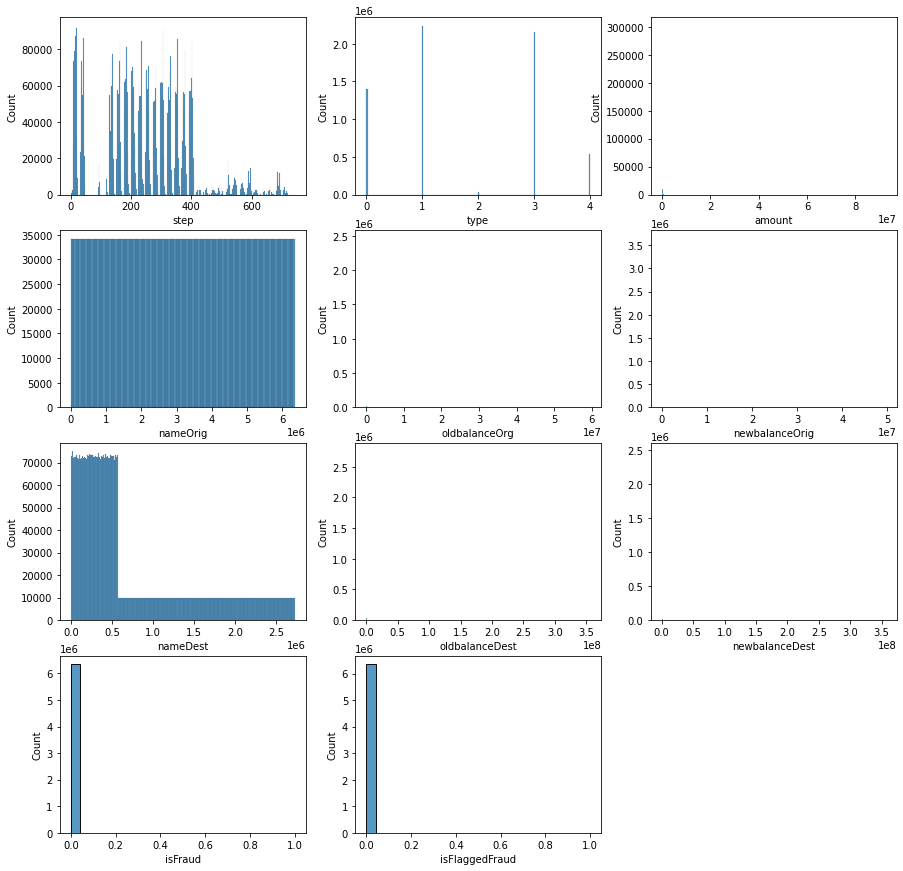

In [ ]:
# Data Exploration

plt.figure(figsize=(15,15))
i = 0

feature_list = ["step", "type", "amount", "nameOrig", "oldbalanceOrg",
                "newbalanceOrig", "nameDest", "oldbalanceDest",
                "newbalanceDest","isFraud", "isFlaggedFraud"]

for col in feature_list:
    i = i + 1
    plt.subplot(4,3,i)
    sns.histplot(data=df[col], legend=True)

plt.show()

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [7]:
# 4.0 is represents TRANSFER and 1.0 is represents CASH_OUT
df = df.loc[(df.type == 4.0) | (df.type == 1.0)]

In [8]:
import pandas as pd
import numpy as np
import numpy
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from scipy.special import comb, logsumexp
from itertools import combinations
from sklearn.metrics.cluster import adjusted_rand_score
def cluster(X):
      
  print('\n')
  print("Cluster Lengths With k=: ",4)
  kMeans = KMeans(n_clusters=4)
  kMeans.fit(X)
  print(Counter(kMeans.labels_))

In [9]:
print("1:")
df1=df[['step']]
df1 = df1.to_numpy()
cluster(df1)
print("2:")
df2=df[['amount']]
df2 = df2.to_numpy()
cluster(df2)
print("3:")
df3=df[['nameOrig']]
df3 = df3.to_numpy()
cluster(df3)
print("4:")
df4=df[['oldbalanceOrg']]
df4 = df4.to_numpy()
cluster(df4)
print("5:")
df5=df[['newbalanceOrig']]
df5 = df5.to_numpy()
cluster(df5)
print("6:")
df6=df[['nameDest']]
df6 = df6.to_numpy()
cluster(df6)
print("7:")
df7=df[['oldbalanceDest']]
df7 = df7.to_numpy()
cluster(df7)
print("8:")
df8=df[['newbalanceDest']]
df8 = df8.to_numpy()
cluster(df8)



1:


Cluster Lengths With k=:  4
Counter({0: 1117466, 2: 1047446, 1: 463432, 3: 142065})
2:


Cluster Lengths With k=:  4
Counter({0: 2648758, 2: 111705, 1: 9141, 3: 805})
3:


Cluster Lengths With k=:  4
Counter({2: 699864, 0: 692293, 1: 690546, 3: 687706})
4:


Cluster Lengths With k=:  4
Counter({0: 2657750, 3: 111605, 1: 985, 2: 69})
5:


Cluster Lengths With k=:  4
Counter({0: 2707346, 3: 62162, 1: 842, 2: 59})
6:


Cluster Lengths With k=:  4
Counter({2: 697683, 3: 692575, 1: 690622, 0: 689529})
7:


Cluster Lengths With k=:  4
Counter({0: 2488963, 3: 261194, 1: 19153, 2: 1099})
8:


Cluster Lengths With k=:  4
Counter({0: 2481277, 3: 268214, 1: 19568, 2: 1350})


[0.7021559575716491, 0.44824820192755394, 0.46152106433172885, 0.48046445419369566, 0.482865380216449, 0.483015465020677, 0.3980553333391907, 0.41717345675553347]
Max silhouette coeficient for df is 0.7021559575716491 for 3 cluster


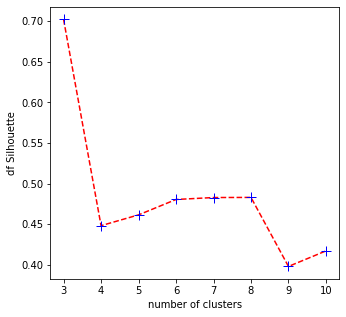

Runtime of KMeans algorithm:  5.271214534000137


In [ ]:
### KMeans parameter scan
start = timeit.default_timer()
plt.figure(figsize=(30,5))

X_list = {'df':df}
i=0

for x_str, x in X_list.items():
  silhouette_list = []
  i=i+1
  for k in range(3,11):
    kmeans_fit = KMeans(n_clusters=k, max_iter=300, random_state=42).fit(x)
    y_pred = kmeans_fit.predict(x)
    silhouette_list.append(metrics.silhouette_score(x, y_pred, metric='euclidean'))
  plt.subplot(1,5,i)
  plt.plot(range(3,11),silhouette_list, marker = '+',color = 'red' , ls = '--', markeredgecolor = 'blue', markersize = '10')
  plt.ylabel(x_str+' Silhouette')
  plt.xlabel('number of clusters')
  plt.xticks(np.arange(3,11,1))
  max_s = max(silhouette_list)
  max_k = silhouette_list.index(max_s)+3
  print(silhouette_list)
  print('Max silhouette coeficient for {} is {} for {} cluster'.format(x_str, max_s, max_k))

plt.show()
stop = timeit.default_timer()
print('Runtime of KMeans algorithm: ', stop - start)

In [ ]:
X = df.drop("isFraud",1)
y = df.isFraud
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
# Here we get the proportions
import matplotlib.pyplot as plt
def pie_chart(l,labels,colors,k):

  nb_samples = [sum(l == j) for j in range(k)]

  # On the next line the order is RANDOM. I do NOT know which cluster represents what.
  # The first label should represent samples in cluster 0, and so on
  fig1, ax1 = plt.subplots(figsize=(8,8))
  flavor_pie = ax1.pie(nb_samples,labels=labels, autopct='%.0f%%', shadow=True, colors=colors, 
                     startangle= -90, textprops={'fontsize': 18})

  centre_circle = plt.Circle((0,0),0.20,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)

  ax1.axis('equal')  
  plt.tight_layout()
  return plt.show()




Cluster Lengths With k=:  3
Counter({0: 2602613, 2: 164948, 1: 2848})
SSE:  4.700200413275542e+19
STD:  0.47408790317863425
NMI:  0.00035348292413869733
Rand Index:  -0.0032060567712881775


Cluster Lengths With k=:  4
Counter({0: 2486220, 3: 263799, 1: 19207, 2: 1183})
SSE:  3.3956838182251258e+19
STD:  0.8828995238767056
NMI:  0.00017852335251177933
Rand Index:  -0.0020989170891853514


Cluster Lengths With k=:  5
Counter({1: 1252411, 4: 1251821, 0: 246261, 3: 18736, 2: 1180})
SSE:  2.7648236971316322e+19
STD:  1.5946961589271114
NMI:  6.610520178906039e-05
Rand Index:  -0.0002920175224448682


Cluster Lengths With k=:  6
Counter({2: 1159803, 0: 1158884, 5: 352473, 3: 86594, 1: 11616, 4: 1039})
SSE:  2.2116358361584775e+19
STD:  1.6348704080870673
NMI:  0.00011568799664378096
Rand Index:  -0.0004148629860102129


Cluster Lengths With k=:  7
Counter({3: 1139603, 0: 1139215, 2: 367145, 5: 104596, 1: 16904, 4: 2440, 6: 506})
SSE:  1.763628979969158e+19
STD:  1.5223896931655825
NMI:  0

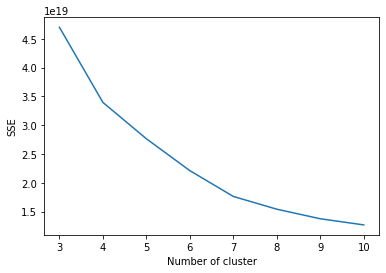

In [ ]:
import pandas as pd
import numpy as np
import numpy
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from scipy.special import comb, logsumexp
from itertools import combinations
from sklearn.metrics.cluster import adjusted_rand_score


def instance_counts():
    sse = {}
    for i in range(3,11):
    
      print('\n')
      print("Cluster Lengths With k=: ",i)
      kMeans = KMeans(n_clusters=i)
      kMeans.fit(X)
      predicted_Y = list(kMeans.labels_)
      sse[i] = kMeans.inertia_
      print(Counter(kMeans.labels_))
      print("SSE: ", kMeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
      print("STD: ", np.std(predicted_Y))
      print("NMI: ", normalized_mutual_info_score(y,predicted_Y))
      print("Rand Index: ", adjusted_rand_score(y,predicted_Y))
      pie_chart(kMeans.labels_,labels[0:i],colors[0:i],i)
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()


instance_counts()





Cluster Lengths With k=:  3
Counter({0: 2602389, 2: 165157, 1: 2863})
SSE:  4.700200558175872e+19
STD:  0.4743721602184757
NMI:  0.00035437322939680245
Rand Index:  -0.003208773864582203


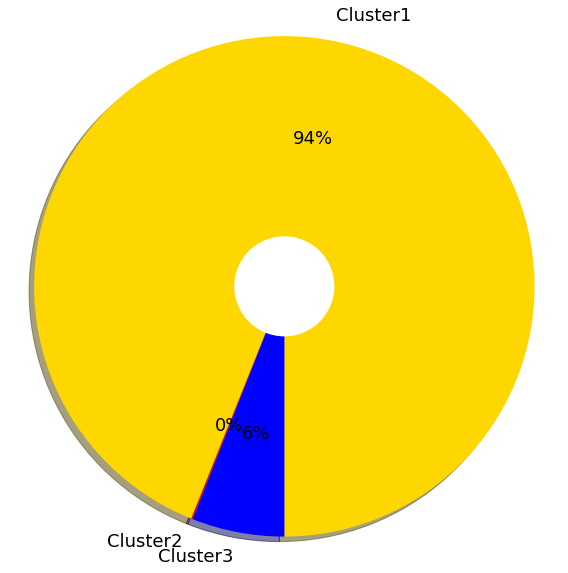



Cluster Lengths With k=:  4
Counter({0: 2486468, 3: 263572, 1: 19187, 2: 1182})
SSE:  3.395686943974538e+19
STD:  0.8825612342357916
NMI:  0.0001779903200806009
Rand Index:  -0.002096409948733693


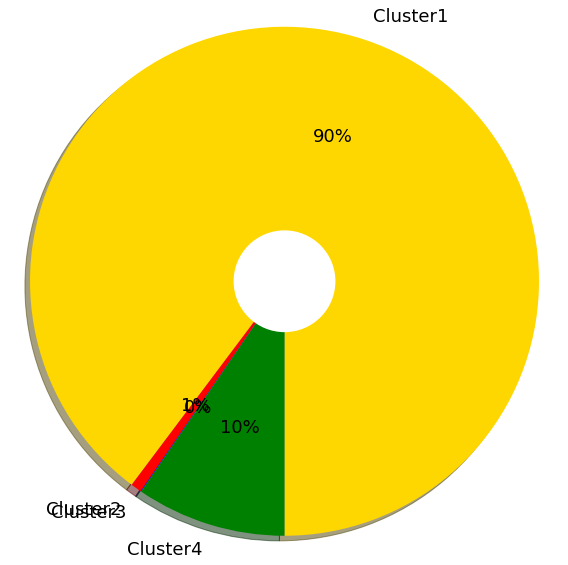



Cluster Lengths With k=:  5
Counter({0: 1252392, 4: 1251800, 2: 246299, 3: 18738, 1: 1180})
SSE:  2.764824021334418e+19
STD:  1.9033608415868288
NMI:  6.614144106626691e-05
Rand Index:  -0.0002921042517135352


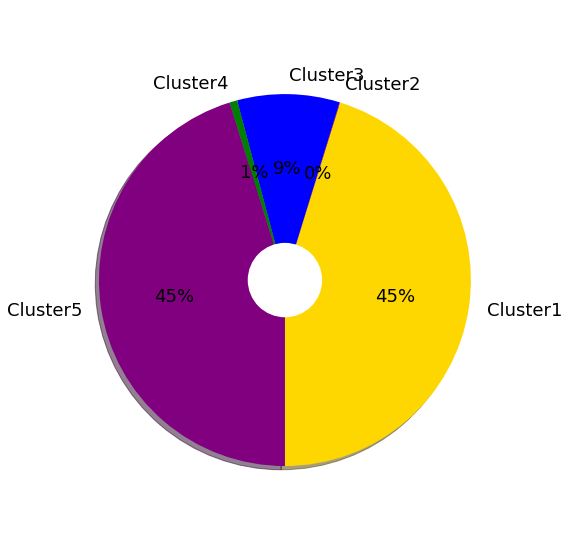



Cluster Lengths With k=:  6
Counter({5: 1159803, 0: 1158884, 3: 352473, 4: 86594, 2: 11616, 1: 1039})
SSE:  2.2116358361584775e+19
STD:  2.3071930575434703
NMI:  0.00011568799664378099
Rand Index:  -0.0004148629860102129


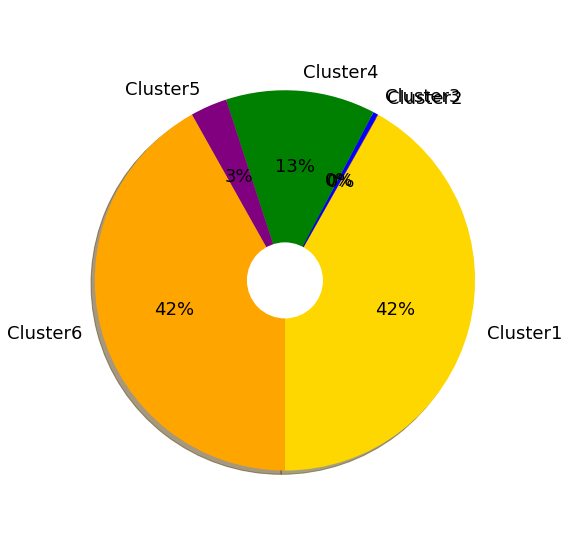



Cluster Lengths With k=:  7
Counter({5: 1139916, 0: 1139539, 3: 366760, 6: 104371, 1: 16878, 4: 2439, 2: 506})
SSE:  1.7636324872969343e+19
STD:  2.369907813352601
NMI:  0.0001278770141050033
Rand Index:  -0.0004400454578125715


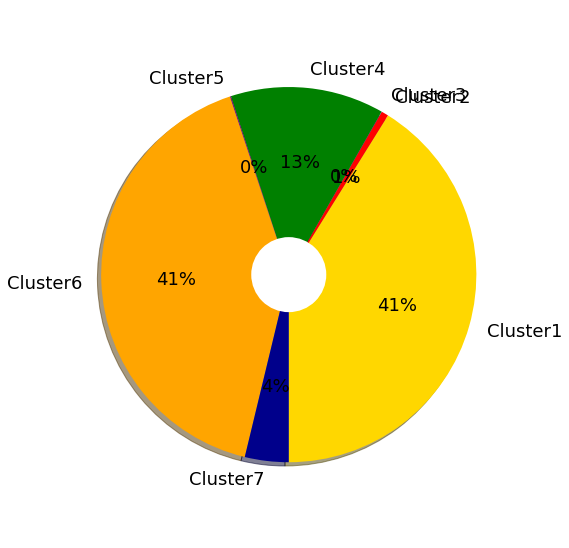



Cluster Lengths With k=:  8
Counter({1: 1132563, 5: 1132195, 2: 371895, 6: 110247, 0: 18931, 7: 3442, 3: 920, 4: 216})
SSE:  1.5423738101333107e+19
STD:  1.960315288073835
NMI:  0.00013122254570584568
Rand Index:  -0.0004477600220763145


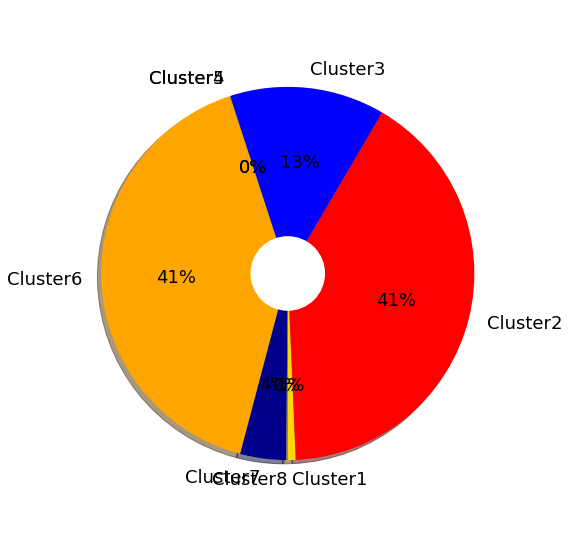



Cluster Lengths With k=:  9
Counter({2: 1074747, 0: 1074103, 7: 390814, 8: 152273, 4: 59599, 6: 14768, 3: 3010, 1: 885, 5: 210})
SSE:  1.376587342473307e+19
STD:  2.6690786674783444
NMI:  0.0001532700146408408
Rand Index:  -0.0004861638524018996


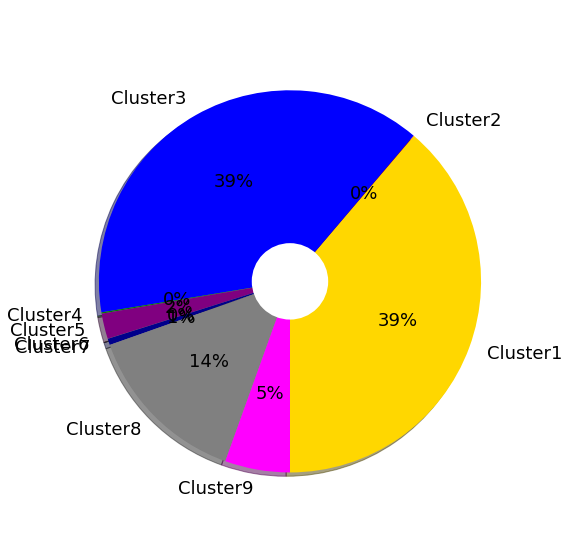



Cluster Lengths With k=:  10
Counter({2: 1070432, 6: 1069712, 0: 390756, 5: 155246, 7: 63065, 3: 15489, 1: 3783, 8: 1329, 4: 498, 9: 99})
SSE:  1.2697274721055078e+19
STD:  2.3309723642359472
NMI:  0.00016154604527061488
Rand Index:  -0.0004937670676877421


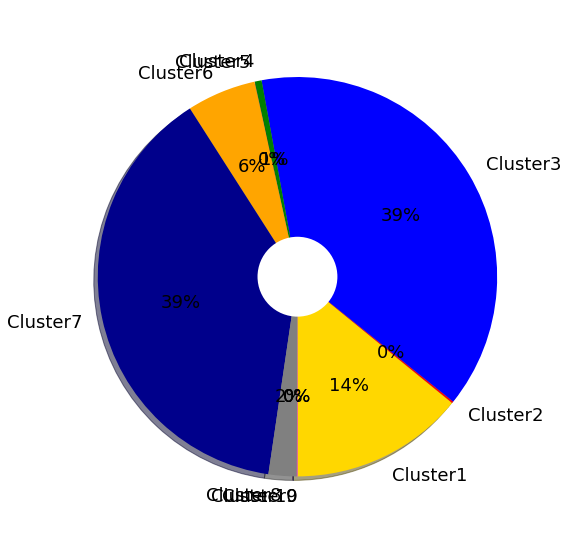

In [ ]:
instance_counts()